# Odds

Odds=(something happening )/(something not happening)

odds=(probability of wining)/(probability of loosing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
rng=np.random.default_rng(seed=42)
rand_value=rng.random(10)
rand_value

array([0.77395605, 0.43887844, 0.85859792, 0.69736803, 0.09417735,
       0.97562235, 0.7611397 , 0.78606431, 0.12811363, 0.45038594])

In [3]:
true_count=np.count_nonzero((rand_value>0.5))
false_count=np.count_nonzero((rand_value>0.5))
total_count=np.count_nonzero(rand_value)
positive_value=true_count/total_count
negative_value=false_count/total_count

In [4]:
odds=positive_value/negative_value

In [5]:
odds

1.0

Scaling fr 1000 values to check something special

In [6]:
odds_lst=[]
for i in range(1001):
    rand_values=np.random.random(10)
    true_count=np.count_nonzero((rand_values>0.5))
    false_count=np.count_nonzero((rand_values<0.5))
    if(false_count==0):
        continue
    odds=true_count/false_count
    odds_lst.append(odds)

In [7]:
odds_lst


[1.0,
 1.0,
 0.6666666666666666,
 0.42857142857142855,
 0.42857142857142855,
 1.0,
 0.6666666666666666,
 1.5,
 2.3333333333333335,
 1.5,
 2.3333333333333335,
 0.42857142857142855,
 1.5,
 0.42857142857142855,
 1.0,
 0.42857142857142855,
 1.0,
 9.0,
 1.5,
 0.6666666666666666,
 0.42857142857142855,
 1.0,
 1.5,
 0.42857142857142855,
 0.6666666666666666,
 4.0,
 1.5,
 0.25,
 4.0,
 0.42857142857142855,
 1.5,
 0.6666666666666666,
 1.5,
 1.0,
 1.0,
 1.5,
 0.6666666666666666,
 1.5,
 1.5,
 0.25,
 0.42857142857142855,
 0.6666666666666666,
 0.6666666666666666,
 2.3333333333333335,
 1.0,
 0.42857142857142855,
 0.42857142857142855,
 2.3333333333333335,
 2.3333333333333335,
 1.0,
 4.0,
 0.42857142857142855,
 1.5,
 1.0,
 0.6666666666666666,
 0.42857142857142855,
 1.5,
 0.42857142857142855,
 0.6666666666666666,
 1.0,
 1.0,
 0.6666666666666666,
 4.0,
 1.5,
 1.5,
 1.5,
 0.6666666666666666,
 0.42857142857142855,
 1.0,
 0.42857142857142855,
 1.0,
 0.6666666666666666,
 1.0,
 0.42857142857142855,
 0.428571428

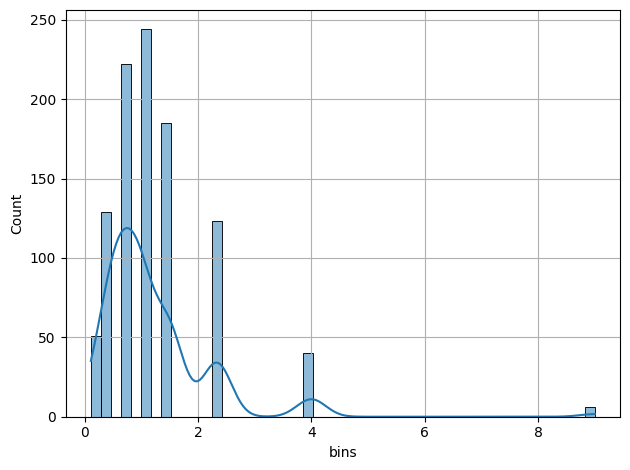

In [8]:
sns.histplot(odds_lst,bins=50,kde=True,label='Odds Plot')
plt.xlabel('bins')
plt.ylabel('Count')
plt.grid()
plt.tight_layout()
plt.show()

---> Here there is distortion in plot let check using log of odds distribution

# log(Odds)

##### Odds=log(something happening )/log(something not happening)
##### odds=log(probability of wining)/log(probability of loosing)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_14976\622638586.py:8: RuntimeWarning: divide by zero encountered in log
  odds=np.log(true_count/false_count)


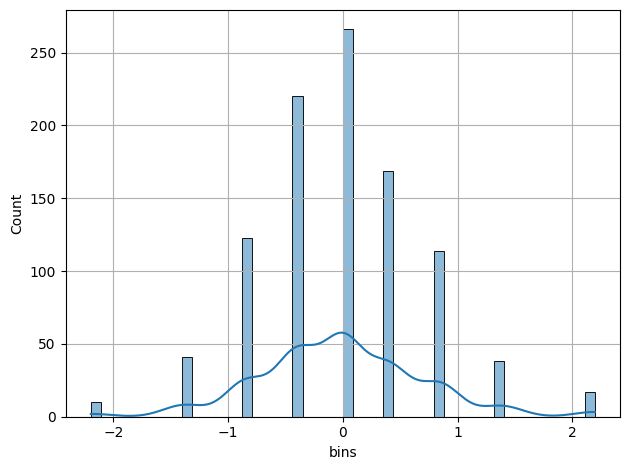

In [9]:
logodds_lst=[]
for i in range(1001):
    rand_values=np.random.random(10)
    true_count=np.count_nonzero((rand_values>0.5))
    false_count=np.count_nonzero((rand_values<0.5))
    if(false_count==0):
        continue
    odds=np.log(true_count/false_count)
    logodds_lst.append(odds)

sns.histplot(logodds_lst,bins=50,kde=True,label='Odds Plot')
plt.xlabel('bins')
plt.ylabel('Count')
plt.grid()
plt.tight_layout()
plt.show()

Little bit distortion let check after some time

## Questions

## Odds ratio 

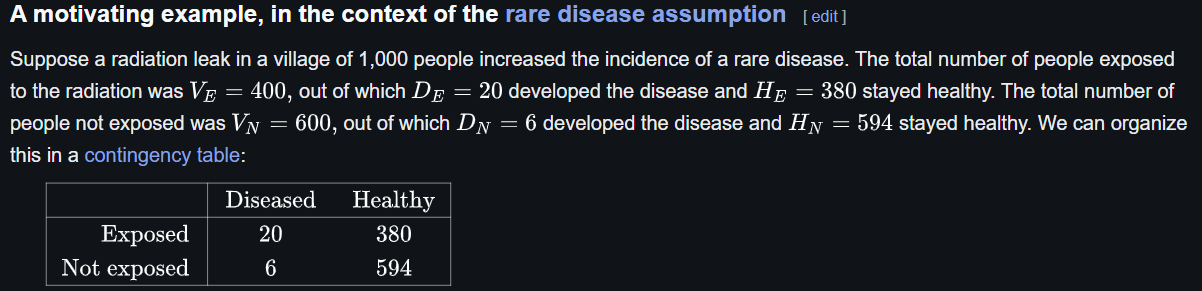

In [10]:
# had exposed to radiation knowing that they have disease 
odds_ratio=(20/400)/(6/600)
odds_ratio

5.0

In [11]:
# had exposed to radiation knowing that he is healthy
odds_ratio=(380/400)/(594/600)
odds_ratio

0.9595959595959596

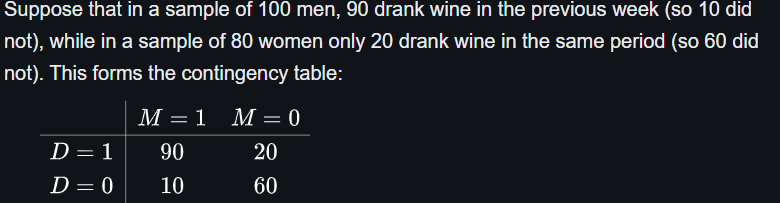

In [12]:
# Knowing that they are people and they drank what is ratio 
oddsRatio1=(90/100)/(20/80)
oddsRatio1

3.6

In [13]:
oddsRatio2=(10/100)/(60/80)
oddsRatio2

0.13333333333333333

<Axes: xlabel='Count'>

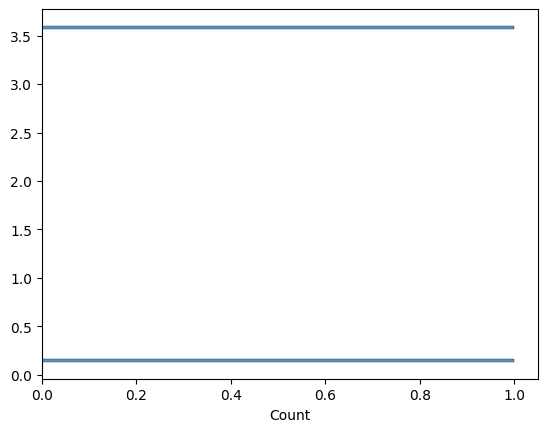

In [14]:
sns.histplot(y=[oddsRatio1,oddsRatio2],bins=100)

<Axes: >

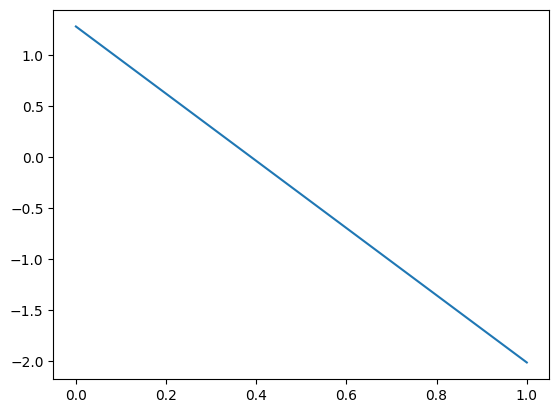

In [16]:
# Getting log of odds ratio
log_odds1=np.log(oddsRatio1)
log_odds2=np.log(oddsRatio2)
sns.lineplot([log_odds1,log_odds2])

 Value is scaled between 1 to 1 and before it was 0.13333 to 3.6

<Axes: >

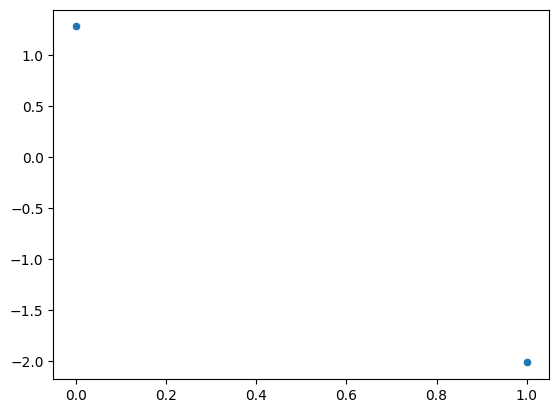

In [17]:
sns.scatterplot([log_odds1,log_odds2])

# process to check whether log(odds) is significant or not
## 1. Fisher Exact Test
## 2. ChiSquare Test
## 3. Wald Test

#  ----------------------------------------------------------------------------------------------------------------

### (1) Fisher Exact Test or Hyperparemeter tuning

In [20]:
# Refering Example one to create 2x2 contengincey table 
table=[[20,380],
       [6,594]]
stats.fisher_exact(table,alternative='two-sided')
# here we are going for two tailed test to determine significance

SignificanceResult(statistic=np.float64(5.2105263157894735), pvalue=np.float64(0.000145624155415758))

## (2) ChiSquare Test

In [22]:
stats.chi2_contingency(table)
# here pvalue<0.05 and it is significance

Chi2ContingencyResult(statistic=np.float64(13.625085557837098), pvalue=np.float64(0.00022318331353988007), dof=1, expected_freq=array([[ 10.4, 389.6],
       [ 15.6, 584.4]]))

## (3) Wald Test

In [23]:
import statsmodels.api as sm

# Expand to raw data
y = np.array([1]*8 + [0]*2 + [1]*1 + [0]*5)  # 1=Success, 0=Failure
X = np.array([0]*10 + [1]*6)                 # 0=Group A, 1=Group B

X = sm.add_constant(X)  # Add intercept
model = sm.Logit(y, X)
result = model.fit()

# Wald test result (inside summary)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.481712
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   16
Model:                          Logit   Df Residuals:                       14
Method:                           MLE   Df Model:                            1
Date:                Sat, 26 Apr 2025   Pseudo R-squ.:                  0.2971
Time:                        20:57:42   Log-Likelihood:                -7.7074
converged:                       True   LL-Null:                       -10.965
Covariance Type:            nonrobust   LLR p-value:                   0.01070
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3863      0.791      1.754      0.080      -0.163       2.936
x1            -2.9957      1.


# 📚 Conclusion — What I Have Learned

---

## 1. Odds, Odds Ratio, and Log-Odds
- **Odds** = Probability of success / Probability of failure.
- **Odds Ratio (OR)** = (Odds in group A) / (Odds in group B).
- **Log-Odds** = \(\log(\text{Odds})\).
- Logistic regression models **log-odds**.

---

## 2. Testing the Significance of an Odds Ratio

| Situation                      | Best Test                                                |
|:--------------------------------|:---------------------------------------------------------|
| Small sample (2x2 table)        | Fisher's Exact Test (`scipy.stats.fisher_exact`)         |
| Large sample (2x2 table)        | Chi-Square Test (`scipy.stats.chi2_contingency`)         |
| Logistic Regression model data | Wald Test (via `Logit` or `GLM` in `statsmodels`)         |

---

## 3. About Wald Test
- Used to test if a coefficient (log-odds) is significantly different from 0.
- Indirectly tests if **odds ratio ≠ 1**.
- In Logistic Regression:  
  Wald statistic = (Estimate / Std Error)^2 → follows Chi-square distribution.
- P-value from Wald test tells whether the odds are **significantly different**.

---

## 4. When Only a Contingency Table is Given
- **Cannot directly** apply Wald test.
- Instead:
  - **Option 1**: Use **Fisher's Exact Test** or **Chi-Square Test**.
  - **Option 2**: Fit a **Logistic Regression model**:
    - By **expanding raw data manually**, **or**
    - Using **`GLM(Binomial)`** with **`freq_weights`** directly on the table.

---

## 5. Best Shortcut: GLM with Binomial Family
- Fit the table **directly** using:

```python
import statsmodels.api as sm
import numpy as np

# Example:
success = np.array([8, 1])
total = np.array([10, 6])
group = np.array([0, 1])

X = sm.add_constant(group)
model = sm.GLM(success, X, family=sm.families.Binomial(), freq_weights=total)
result = model.fit()

print(result.summary())
